# Evaluation of the results

In [68]:
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

## NUTS

In [2]:
idata_nuts = az.from_netcdf('../scripts/jax_cosmo_results/nuts_res.nc')

In [3]:
az.summary(idata_nuts)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Omega_m,0.263,0.079,0.094,0.367,0.008,0.006,141.0,185.0,1.07
w0,-0.961,0.087,-1.089,-0.782,0.009,0.006,142.0,174.0,1.07
wa,0.106,0.530,-0.805,0.944,0.038,0.027,143.0,189.0,1.07


In [49]:
#cut off the chains with many divergences
idata_nuts_sel=idata_nuts.sel(chain=[2,3,5,6,7,8,10,11,12,14,15])

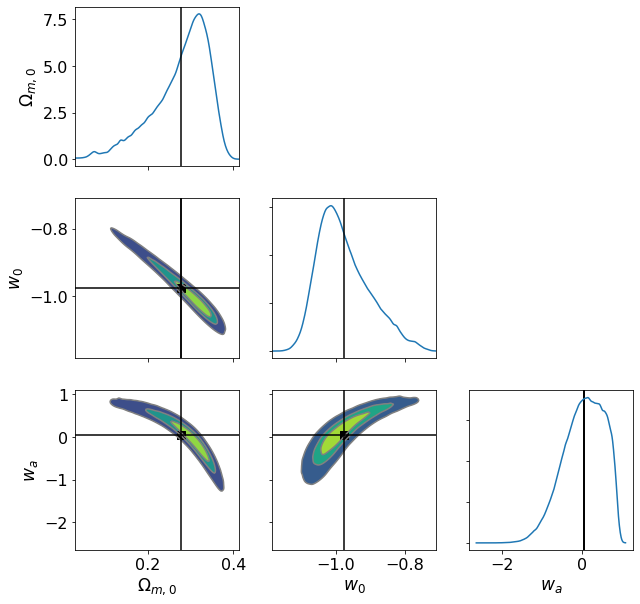

In [52]:
var_dict = {"Omega_m" : r"$\Omega_{m,0}$",
               "w0" :  r"$w_0$",
               "wa" : r"$w_a$"}   

labeller = az.labels.MapLabeller(var_name_map=var_dict)

az.plot_pair(idata_nuts_sel, 
             kind='kde', 
             marginals=True, 
             figsize=(10,10), 
             textsize=16, 
             contour=False, 
             labeller=labeller, 
             kde_kwargs = {'hdi_probs' : [0.3, 0.6, 0.9]},
             point_estimate = 'mean'
            );

## ADVI

In [54]:
idata_advi = az.from_netcdf('../scripts/jax_cosmo_results/advi_res.nc')

In [56]:
az.summary(idata_advi, kind='stats')

,mean,sd,hdi_3%,hdi_97%
Omega_m,0.320,0.018,0.287,0.355
w0,-1.012,0.028,-1.064,-0.958
wa,-0.235,0.256,-0.705,0.255


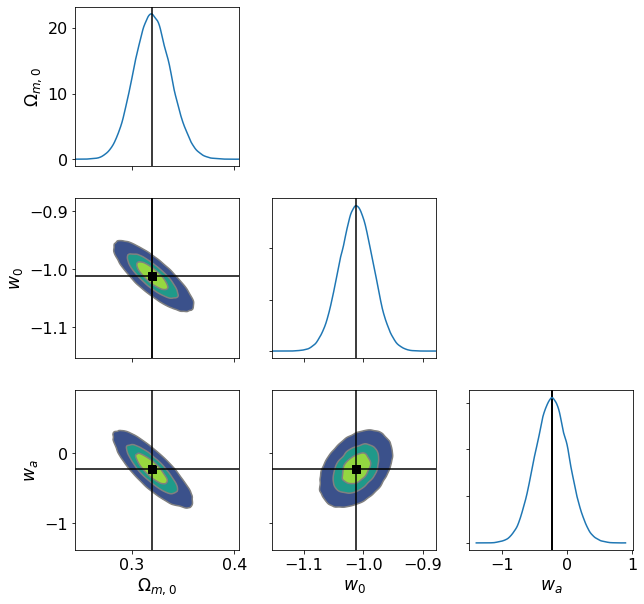

In [59]:
az.plot_pair(idata_advi, 
             kind='kde', 
             marginals=True, 
             figsize=(10,10), 
             textsize=16, 
             contour=False, 
             labeller=labeller, 
             kde_kwargs = {'hdi_probs' : [0.3, 0.6, 0.9]},
             point_estimate = 'mean'
            );

## Comparison

/home/jakob/.local/lib/python3.10/site-packages/arviz/plots/kdeplot.py:300: UserWarning: Both 'levels' in contour_kwargs and 'hdi_probs' have been specified.Using 'hdi_probs' in favor of 'levels'.
  warnings.warn(
/home/jakob/.local/lib/python3.10/site-packages/arviz/plots/kdeplot.py:311: UserWarning: Both 'levels' in contourf_kwargs and 'hdi_probs' have been specified.Using 'hdi_probs' in favor of 'levels'.
  warnings.warn(
/home/jakob/.local/lib/python3.10/site-packages/arviz/plots/kdeplot.py:300: UserWarning: Both 'levels' in contour_kwargs and 'hdi_probs' have been specified.Using 'hdi_probs' in favor of 'levels'.
  warnings.warn(
/home/jakob/.local/lib/python3.10/site-packages/arviz/plots/kdeplot.py:311: UserWarning: Both 'levels' in contourf_kwargs and 'hdi_probs' have been specified.Using 'hdi_probs' in favor of 'levels'.
  warnings.warn(
/home/jakob/.local/lib/python3.10/site-packages/arviz/plots/kdeplot.py:300: UserWarning: Both 'levels' in contour_kwargs and 'hdi_probs' have 

<Figure size 432x288 with 0 Axes>

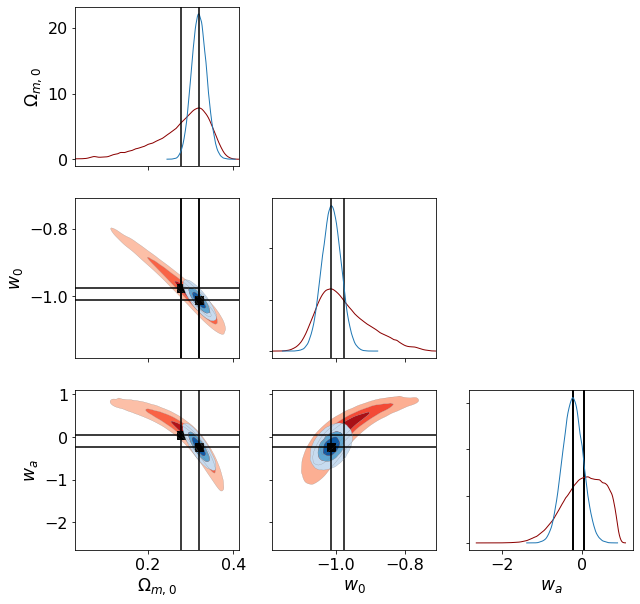

In [71]:
fig, ax plt.subplots(3,3, figsize=(10,10))== az.plot_pair(idata_nuts_sel, 
             kind='kde', 
             marginals=True, 
             figsize=(10,10), 
             textsize=16, 
             contour=False, 
             labeller=labeller, 
             point_estimate = 'mean',
             kde_kwargs={"contourf_kwargs": {"cmap": "Reds", "levels":3}, 
                         "contour_kwargs": {"linewidths":0.2, "levels":3}, 
                         'hdi_probs' : [0.3, 0.6, 0.9]
                        }, 
             marginal_kwargs={"color": "darkred",'plot_kwargs':{'linewidth':1, 'linestyle':'-'}}
            );




az.plot_pair(idata_advi, 
             kind='kde', 
             marginals=True, 
             figsize=(10,10), 
             textsize=16, 
             contour=False, 
             labeller=labeller, 
             kde_kwargs={"contourf_kwargs": {"cmap": "Blues", "levels":3}, 
                         "contour_kwargs": {"linewidths":0.2, "levels":3}, 
                         'hdi_probs' : [0.3, 0.6, 0.9]
                        }, 
             marginal_kwargs={"color": "tab:blue",'plot_kwargs':{'linewidth':1, 'linestyle':'-'}},
             point_estimate = 'mean',
             ax = ax
            );

h_nuts = mlines.Line2D([], [], color='darkred', label='NUTS')
h_advi = mlines.Line2D([], [], color='tab:blue', label='ADVI')

fig.legend(handles=(h_nuts, h_advi))